## Importing Datasets and Libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import re

In [3]:
df = pd.read_csv('/content/Grades.csv')

In [4]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


## Checking for Null Values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

Checking if students are failing in a subject.

In [9]:
for i in df.columns:
  if 'F' in df[i].unique():
    print(i)

PH-121
HS-101
CY-105
HS-105/12
MT-111
CS-106
EL-102
ME-107
CS-107
HS-205/20
MT-222
EE-222
MT-224
CS-210
CS-211
CS-203
CS-214
EE-217
CS-215
MT-331
EF-303
HS-304
CS-301
TC-383
MT-442
EL-332
CS-318
CS-306
CS-312
CS-317
CS-421
CS-406
CS-414
CS-419
CS-423
CS-412


In [10]:
df['CS-106'].value_counts()

CS-106
A-    116
B+    101
B      96
A      56
B-     54
C+     41
D+     29
C-     27
D      24
C      18
A+      4
WU      2
F       1
Name: count, dtype: int64

In [11]:
indices_with_wu = df[df['CS-106'] == 'WU'].index

print(indices_with_wu)

Index([137, 143], dtype='int64')


Printing indices 137 and 143.

In [18]:
for i,j in zip(df.columns,df.iloc[137]):
  print(i,j)

Seat No. CS-97138
PH-121 C-
HS-101 C+
CY-105 WU
HS-105/12 WU
MT-111 WU
CS-105 B
CS-106 WU
EL-102 WU
EE-119 A-
ME-107 C+
CS-107 WU
HS-205/20 nan
MT-222 nan
EE-222 nan
MT-224 nan
CS-210 nan
CS-211 nan
CS-203 nan
CS-214 nan
EE-217 nan
CS-212 nan
CS-215 nan
MT-331 nan
EF-303 nan
HS-304 nan
CS-301 nan
CS-302 nan
TC-383 nan
MT-442 nan
EL-332 nan
CS-318 nan
CS-306 nan
CS-312 nan
CS-317 nan
CS-403 nan
CS-421 nan
CS-406 nan
CS-414 nan
CS-419 nan
CS-423 nan
CS-412 nan
CGPA 2.653


In [19]:
for i,j in zip(df.columns,df.iloc[143]):
  print(i,j)

Seat No. CS-97144
PH-121 D
HS-101 D
CY-105 WU
HS-105/12 WU
MT-111 WU
CS-105 D
CS-106 WU
EL-102 WU
EE-119 D
ME-107 WU
CS-107 WU
HS-205/20 nan
MT-222 nan
EE-222 nan
MT-224 nan
CS-210 nan
CS-211 nan
CS-203 nan
CS-214 nan
EE-217 nan
CS-212 nan
CS-215 nan
MT-331 nan
EF-303 nan
HS-304 nan
CS-301 nan
CS-302 nan
TC-383 nan
MT-442 nan
EL-332 nan
CS-318 nan
CS-306 nan
CS-312 nan
CS-317 nan
CS-403 nan
CS-421 nan
CS-406 nan
CS-414 nan
CS-419 nan
CS-423 nan
CS-412 nan
CGPA 1.0


## Interpretation Based on The data and fundamental Knowledge

Some students seem to have empty values as grades for some subjects in semester. We will deep dive into the reasons, why ? -

The 'WU' grade actually means - Withdrawal Unauthorized - The meaning of it is that the student has stopped attending the classes for the same subject without any approval or notice and this is considered as 'F' i.e Fail.

You can also see in the data that students who dropout of these subjects do not / cannot give exams for the same subject in the upcoming semester, hence there are 'Nan' values which also mean that these values will not be taken into consideration while calculating the CGPA.

Hence while filling the 'Nan', 'F' and 'WU' values we will consider them or convert them into 0.

## Handling Null Values and Converting to Categorical

We will drop the Seat number column as it does not play a role while predicting the grades.

In [23]:
df = df.drop('Seat No.',axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

Values of scores - F,WU,D-,D,D+,C-,C,C+,B-,B,B+,A-,A,A+

Now you would think why are we not converting the values to One Hot Encoded Vectors ?

Because we want the model to think there is a relationship between these values and the output Grade !

In [21]:
dic = {'F':0, 'WU':0, 'D-':1, 'D':2, 'D+':3, 'C-':4, 'C':5, 'C+':6, 'B-':7, 'B':8, 'B+':9, 'A-':10, 'A':11, 'A+':12}

In [29]:
list_col = list(df.columns)
list_col = list_col[0:-1]
print(list_col)

['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']


In [30]:
for i in list_col:
  df[i] = df[i].map(dic)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    int64  
 1   HS-101     571 non-null    int64  
 2   CY-105     570 non-null    float64
 3   HS-105/12  570 non-null    float64
 4   MT-111     569 non-null    float64
 5   CS-105     571 non-null    int64  
 6   CS-106     569 non-null    float64
 7   EL-102     569 non-null    float64
 8   EE-119     569 non-null    float64
 9   ME-107     569 non-null    float64
 10  CS-107     568 non-null    float64
 11  HS-205/20  566 non-null    float64
 12  MT-222     565 non-null    float64
 13  EE-222     562 non-null    float64
 14  MT-224     563 non-null    float64
 15  CS-210     563 non-null    float64
 16  CS-211     565 non-null    float64
 17  CS-203     565 non-null    float64
 18  CS-214     564 non-null    float64
 19  EE-217     565 non-null    float64
 20  CS-212    

Now we will fill all the null values with 0

In [32]:
df = df.fillna(0)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    int64  
 1   HS-101     571 non-null    int64  
 2   CY-105     571 non-null    float64
 3   HS-105/12  571 non-null    float64
 4   MT-111     571 non-null    float64
 5   CS-105     571 non-null    int64  
 6   CS-106     571 non-null    float64
 7   EL-102     571 non-null    float64
 8   EE-119     571 non-null    float64
 9   ME-107     571 non-null    float64
 10  CS-107     571 non-null    float64
 11  HS-205/20  571 non-null    float64
 12  MT-222     571 non-null    float64
 13  EE-222     571 non-null    float64
 14  MT-224     571 non-null    float64
 15  CS-210     571 non-null    float64
 16  CS-211     571 non-null    float64
 17  CS-203     571 non-null    float64
 18  CS-214     571 non-null    float64
 19  EE-217     571 non-null    float64
 20  CS-212    

Now we can confirm that all the values in the dataframe are Non-Null, and can use the dataset for further calculations.

## Splitting into Train and Test

It is always a good idea to split the data into Train and Test prior to any analysis

In [34]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

## Visualizations and Descriptions

In [35]:
train_set.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,...,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,7.883772,6.651316,8.706140,7.528509,7.859649,8.907895,7.697368,7.791667,7.875000,6.813596,...,7.785088,6.800439,8.061404,6.232456,7.300439,8.958333,7.767544,7.660088,7.269737,2.925570
std,2.983044,2.775703,2.900785,3.209063,2.933332,2.562679,2.632108,3.027060,2.571131,3.109417,...,3.492201,2.851967,2.923298,2.834388,3.872087,2.770412,2.583702,2.945779,3.763860,0.627715
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,6.000000,4.000000,7.000000,5.000000,6.000000,8.000000,6.000000,6.000000,6.000000,4.000000,...,5.000000,5.000000,6.000000,4.000000,5.000000,8.000000,6.000000,6.000000,6.000000,2.466500
50%,9.000000,7.000000,10.000000,8.000000,9.000000,10.000000,8.000000,9.000000,8.000000,7.000000,...,8.000000,7.000000,9.000000,7.000000,9.000000,10.000000,8.000000,8.000000,9.000000,3.021000
75%,10.000000,9.000000,11.000000,10.000000,10.000000,11.000000,10.000000,10.000000,10.000000,10.000000,...,11.000000,9.000000,11.000000,8.000000,10.000000,11.000000,10.000000,10.000000,10.000000,3.426750
max,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,3.985000


Univariate Analysis

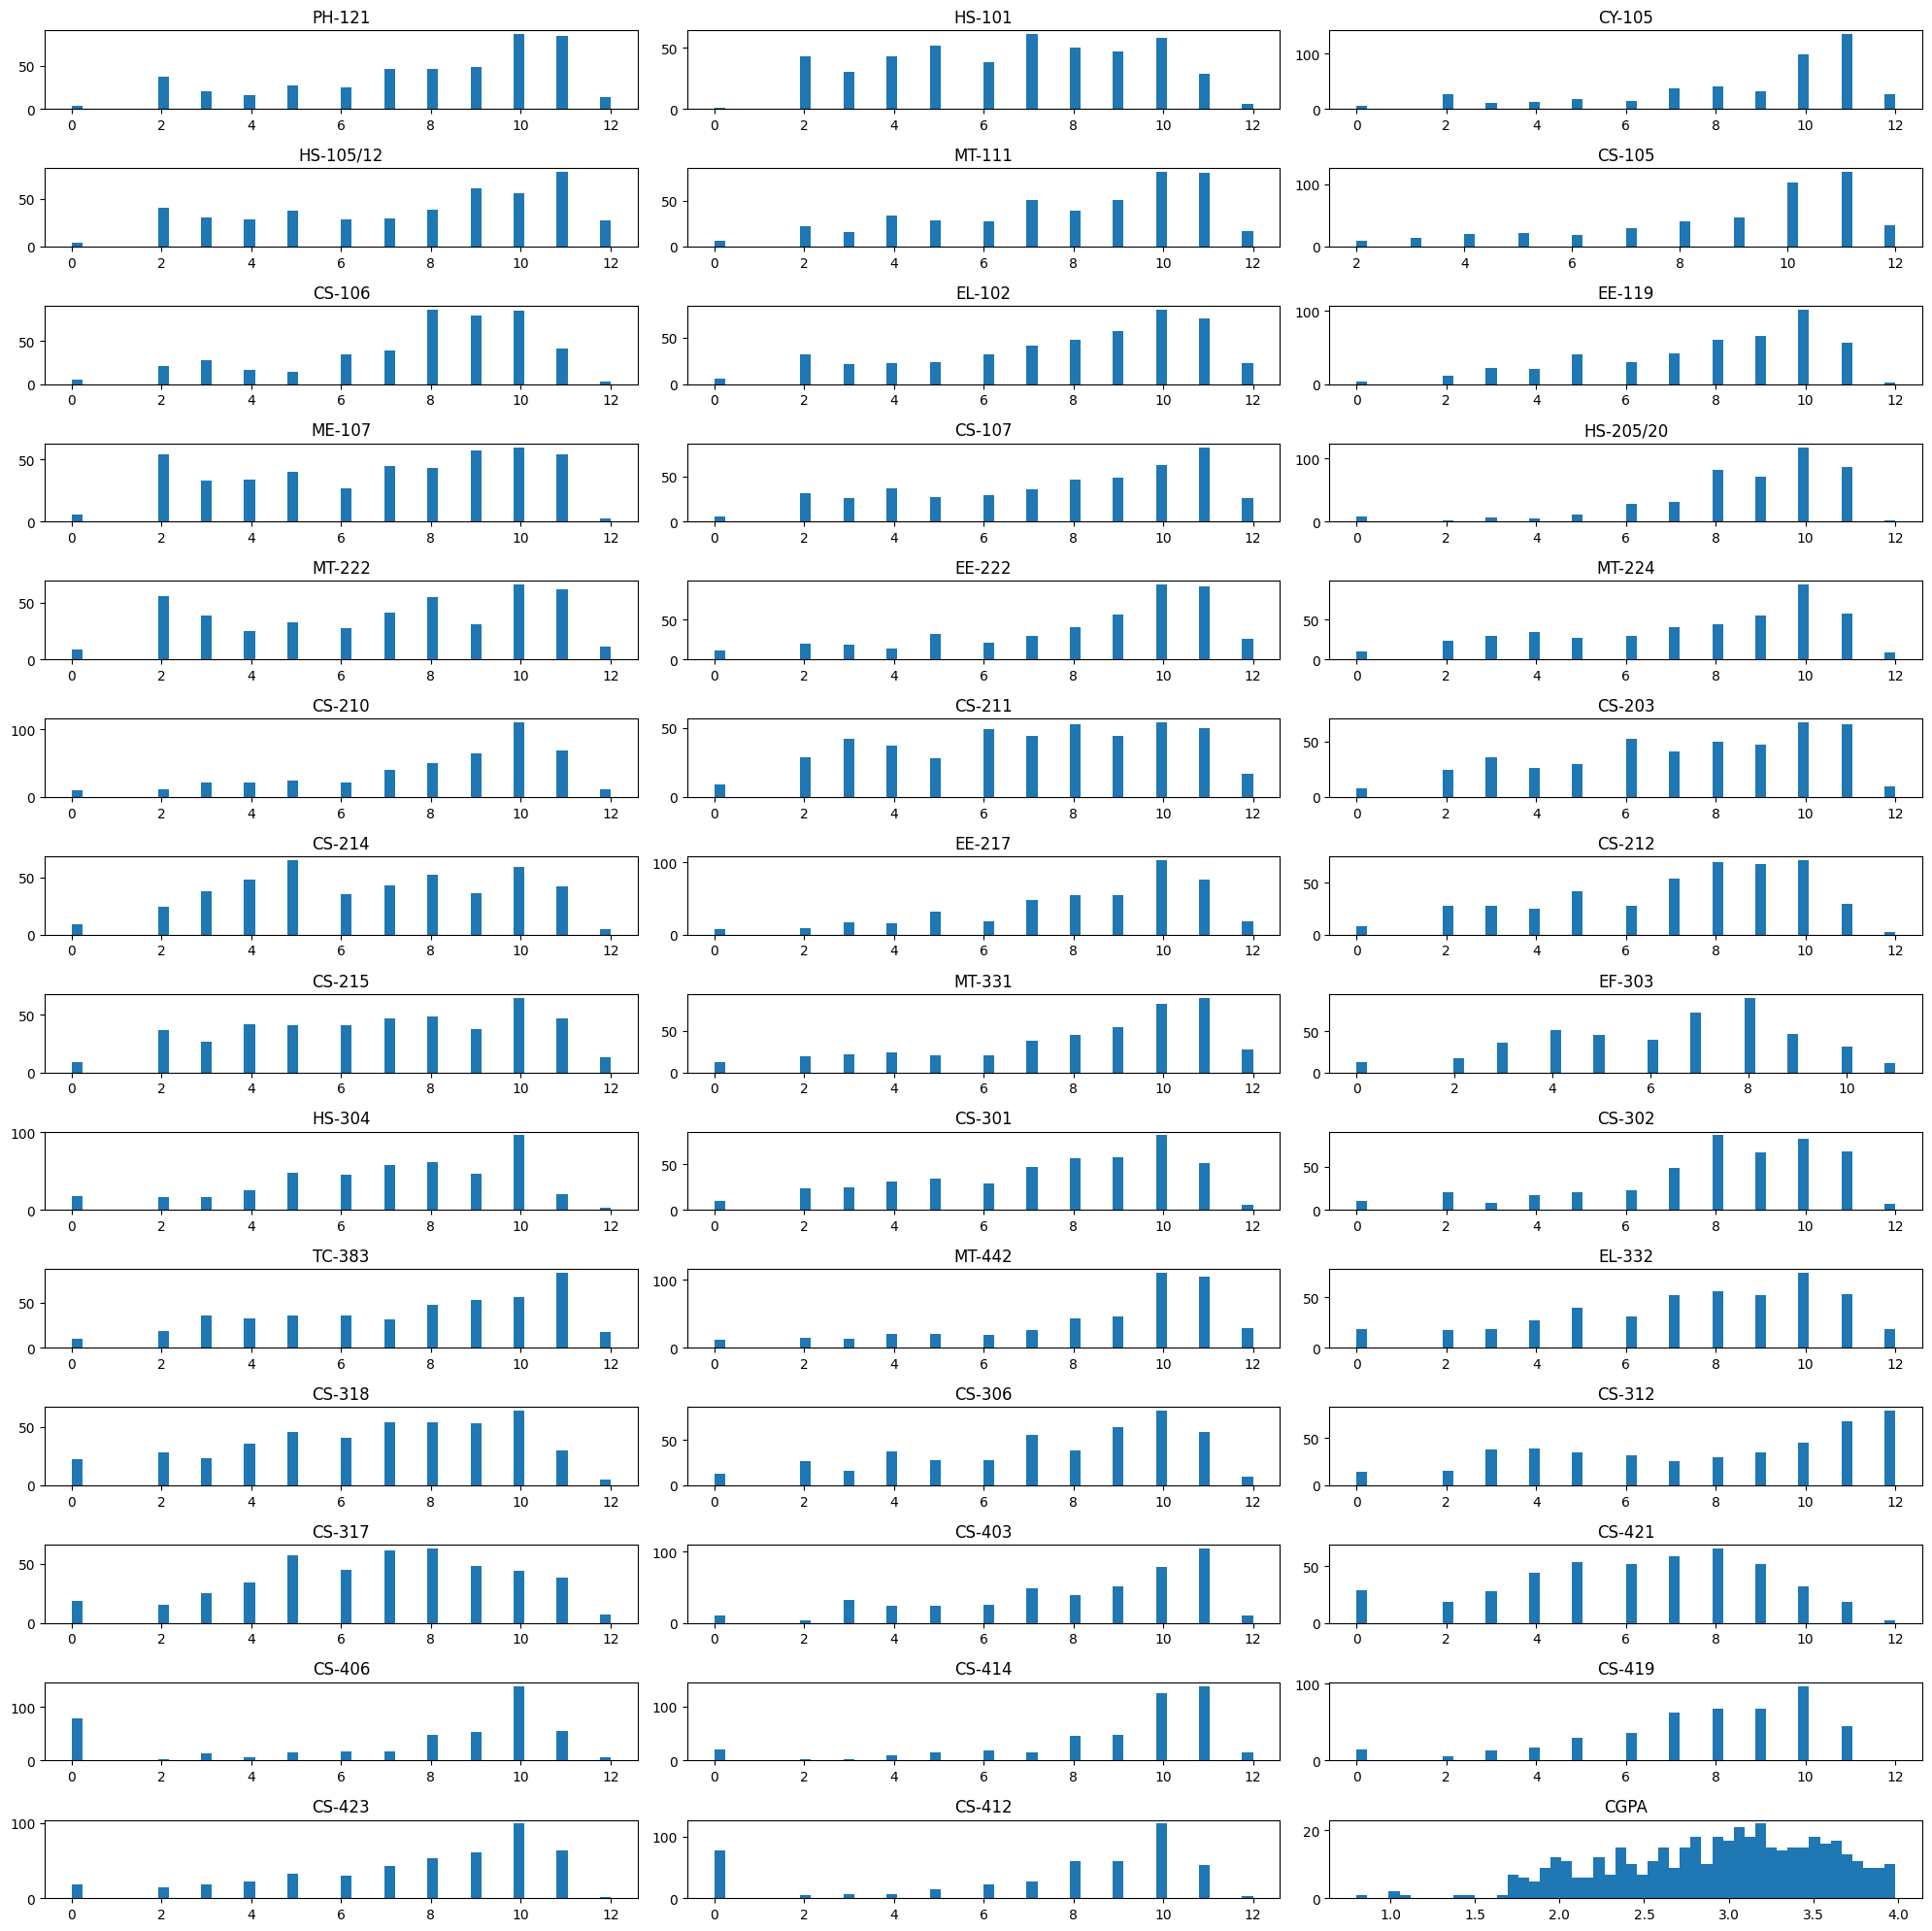

In [38]:
num_histograms = 42
num_cols = 3
num_rows = (num_histograms - 1) // num_cols + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))

axes = axes.flatten()
for i, col in enumerate(train_set.columns[:num_histograms]):
    axes[i].hist(train_set[col], bins=50)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Boxplots for Outlier Detection

There don't seem to be outliers in most of the columns. We will not touch any outliers for now. Why ?

Mostly because this given problem is more of a linear problem with multiple independent variables (multivariate), because each and every subject and the grade in each semester is contributing equally to the final CGPA. So some students might be outliers as a few of them have dropped out or did not complete their course, but they still got a CGPA.
The weightage of each subject even if the test was not given accounted for the calculation of CGPA. Hence these outliers won't affect our model as the relationship is near about linear when all the marks are considered and not just a single column.

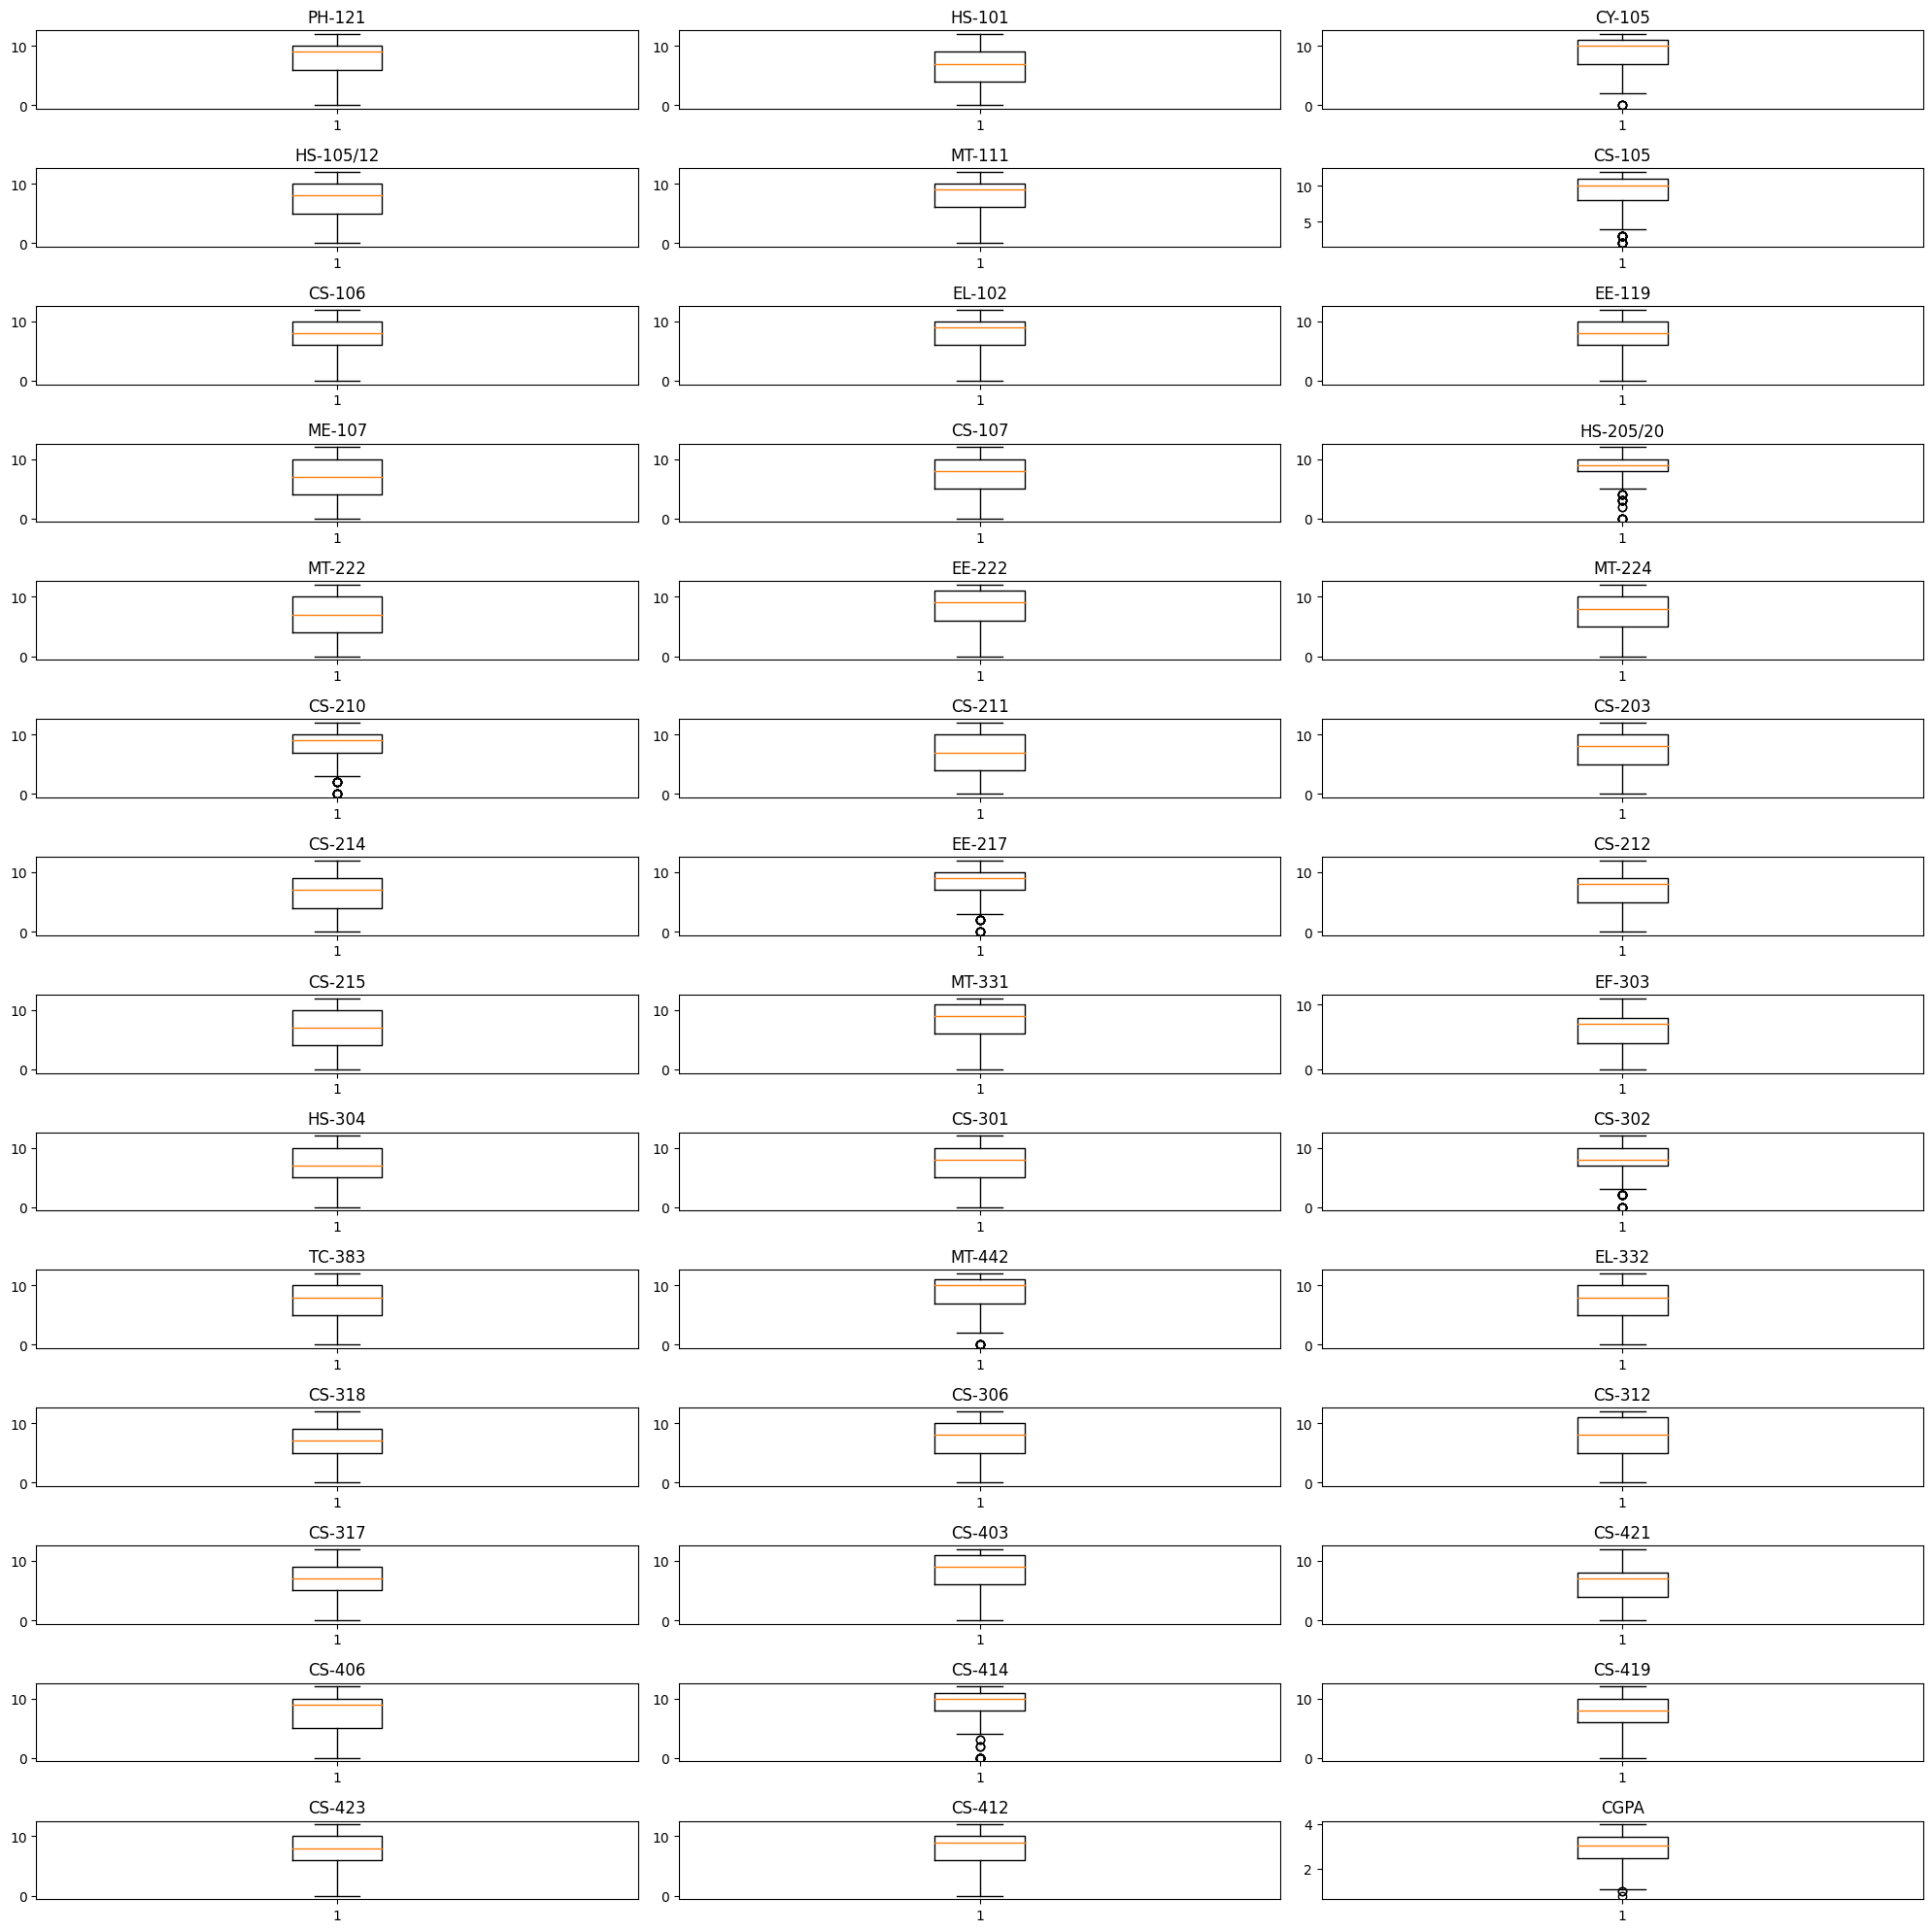

In [39]:
num_histograms = 42
num_cols = 3
num_rows = (num_histograms - 1) // num_cols + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))

axes = axes.flatten()
for i, col in enumerate(train_set.columns[:num_histograms]):
    axes[i].boxplot(train_set[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Bivariate Analysis

See from all the scatter plots it very evident that the grades have a linear relationship with the CGPA. Which is very logical.

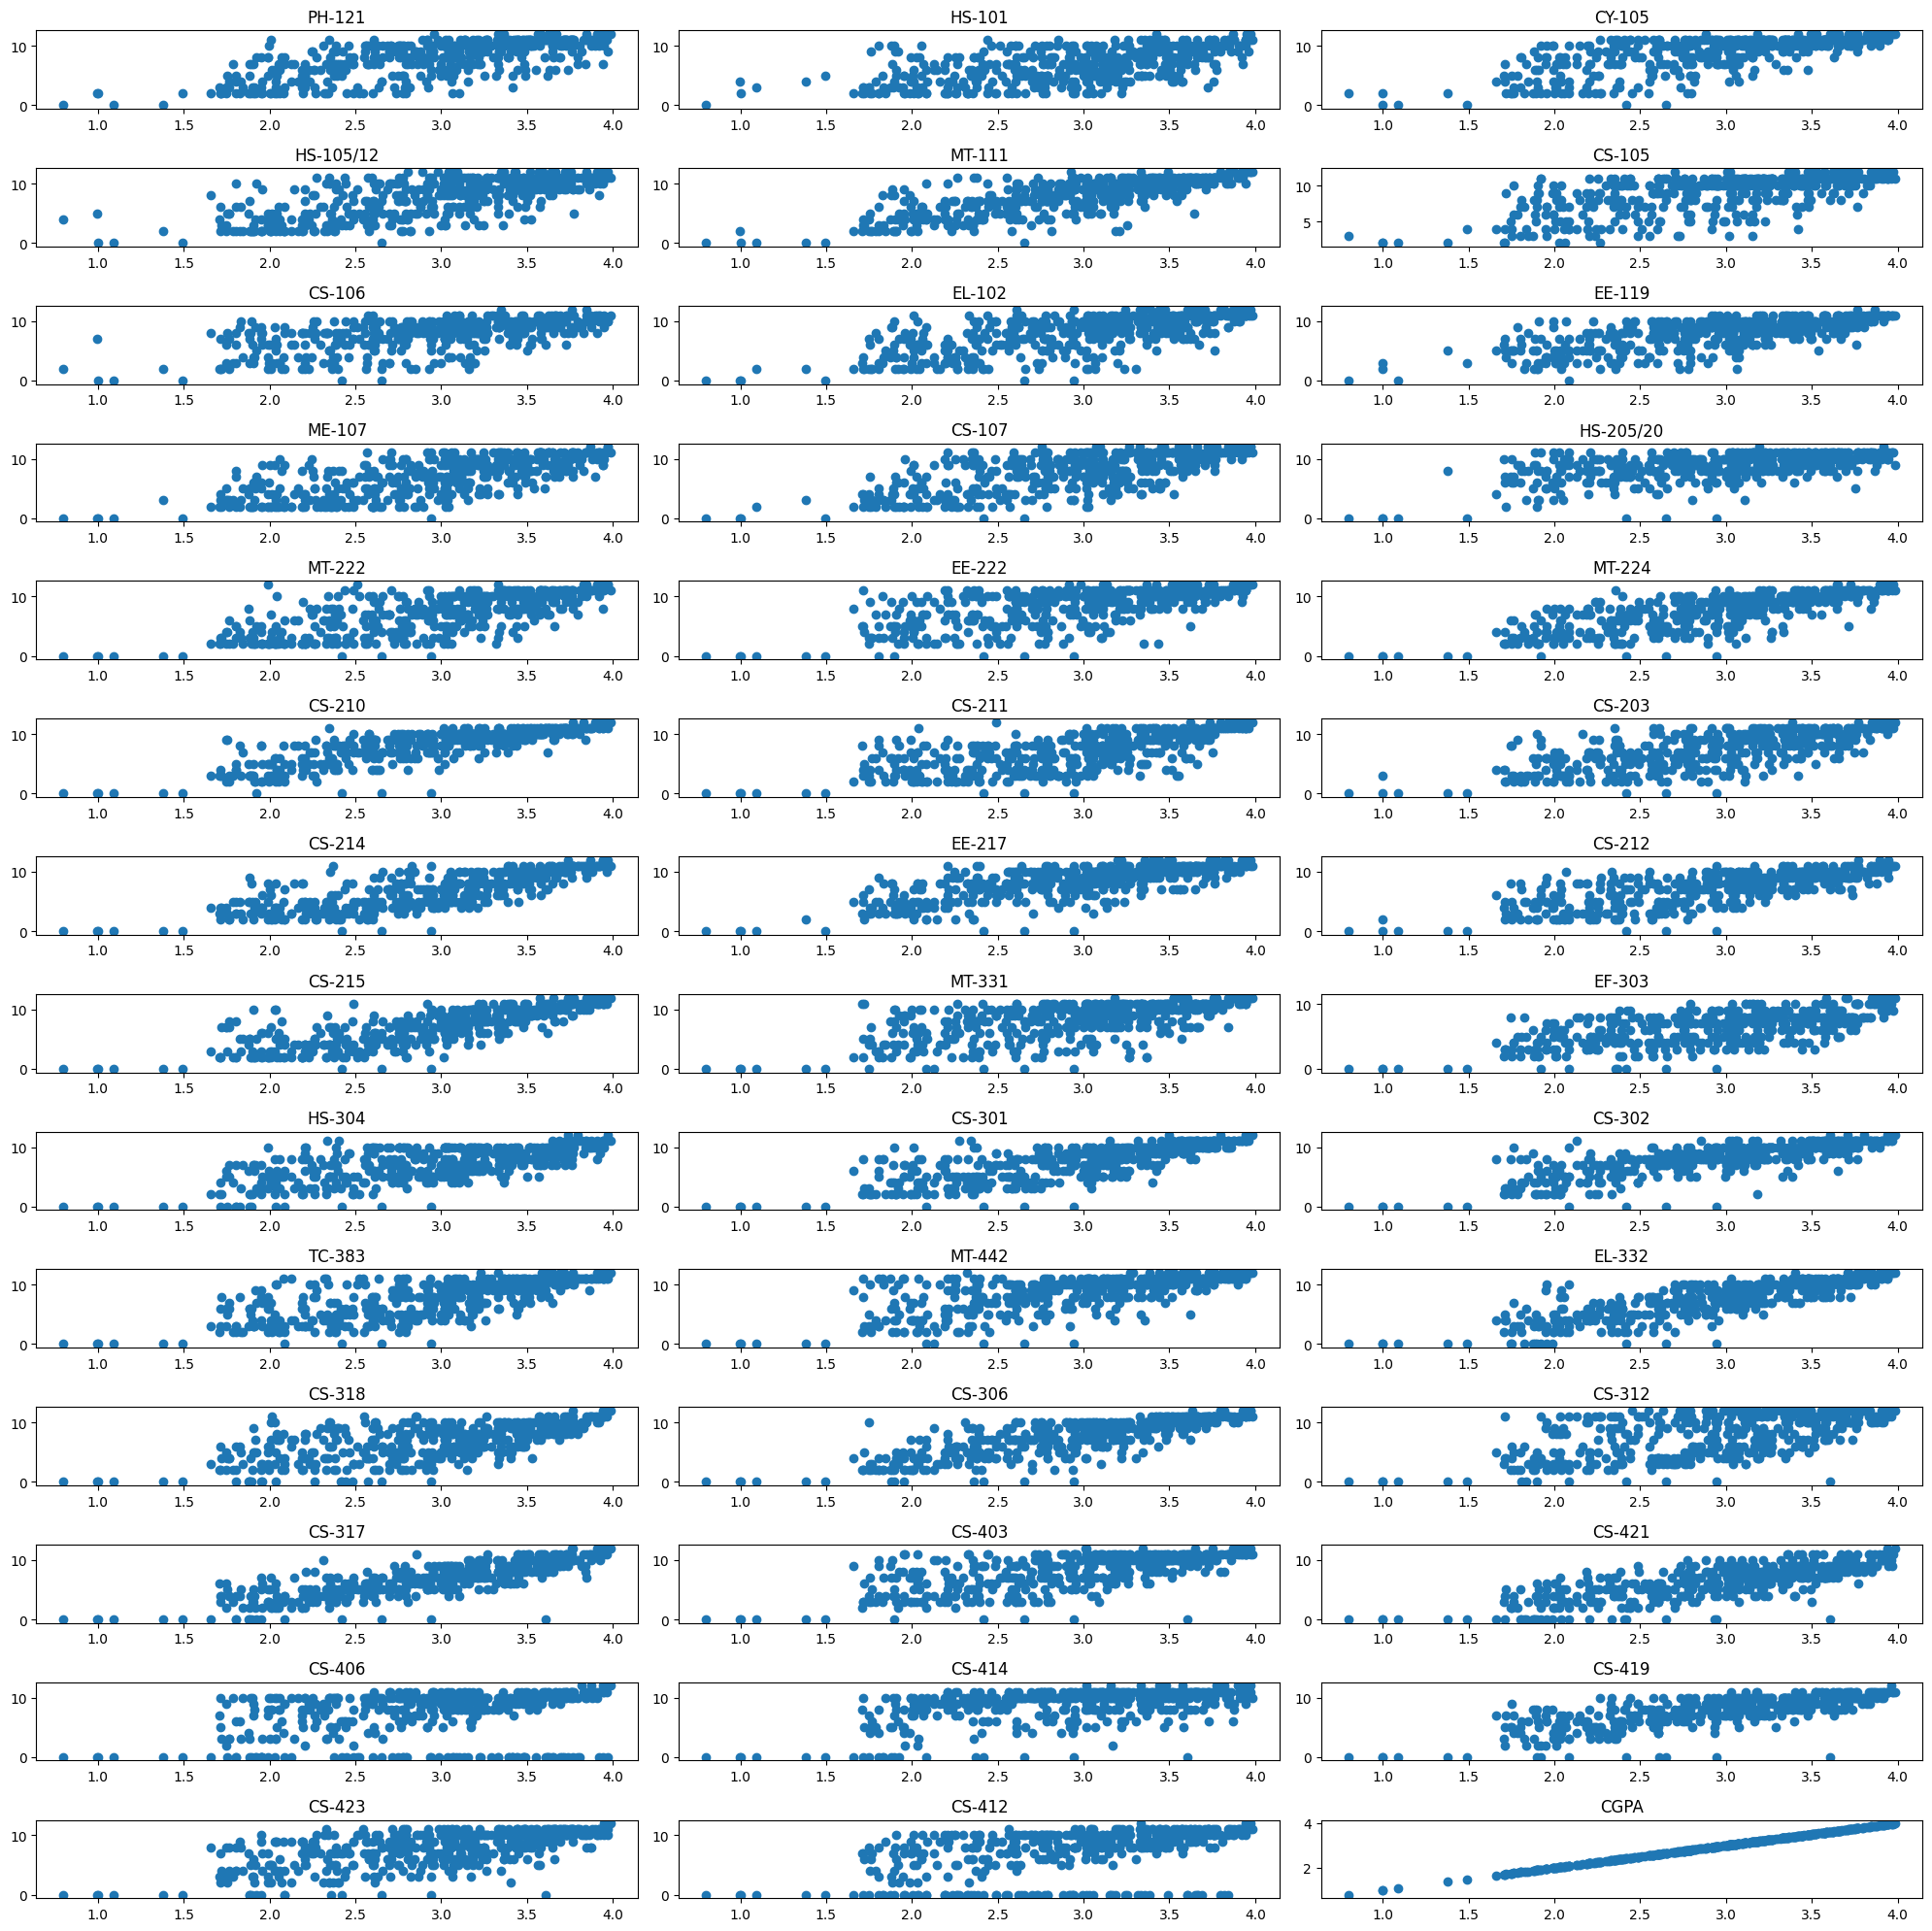

In [43]:
num_histograms = 42
num_cols = 3
num_rows = (num_histograms - 1) // num_cols + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))

axes = axes.flatten()
for i, col in enumerate(train_set.columns[:num_histograms]):
    axes[i].scatter(train_set['CGPA'], train_set[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

## Correlations

You can see that all the columns are highly correlated with the output column. Not only that but they are also highly correlated with each other ! The Multicollinearity Problem ! - Now this is because most of students performing good in semester 1 also tend to perform good in semester 2 and so on.

Another problem here is the Dimensionality. There are just too many dimensions - 42 dimension.

A way to solve this issue would be to aggreagate the score by year of all subjects.

In [44]:
train_set.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.410233,0.649302,0.564791,0.549199,0.673067,0.327769,0.468034,0.659752,0.583154,...,0.119540,0.539773,0.437088,0.419103,0.444090,0.299660,0.530589,0.214089,0.553631,0.684053
HS-101,0.410233,1.000000,0.365024,0.496200,0.481744,0.458009,0.374490,0.389189,0.348647,0.378241,...,0.244607,0.405974,0.276753,0.368737,0.131235,0.300203,0.305552,0.284638,0.313427,0.568962
CY-105,0.649302,0.365024,1.000000,0.610274,0.613495,0.631704,0.429028,0.506117,0.581180,0.493915,...,0.374078,0.588775,0.617942,0.493225,0.233683,0.254452,0.574423,0.274293,0.366190,0.696761
HS-105/12,0.564791,0.496200,0.610274,1.000000,0.545601,0.554327,0.551866,0.391460,0.509866,0.419134,...,0.364145,0.559551,0.580362,0.505485,0.214477,0.270211,0.561434,0.348721,0.291681,0.682916
MT-111,0.549199,0.481744,0.613495,0.545601,1.000000,0.452912,0.559818,0.600396,0.458969,0.513989,...,0.550588,0.631887,0.512589,0.596061,0.131625,0.356270,0.586688,0.464246,0.243508,0.782101
CS-105,0.673067,0.458009,0.631704,0.554327,0.452912,1.000000,0.308655,0.381416,0.615330,0.512233,...,0.121802,0.468394,0.400038,0.359389,0.402801,0.259182,0.438232,0.171107,0.483814,0.638551
CS-106,0.327769,0.374490,0.429028,0.551866,0.559818,0.308655,1.000000,0.382389,0.300970,0.358304,...,0.578473,0.498152,0.565122,0.509673,0.027055,0.248729,0.531603,0.463759,0.087679,0.596442
EL-102,0.468034,0.389189,0.506117,0.391460,0.600396,0.381416,0.382389,1.000000,0.458066,0.490186,...,0.422795,0.528263,0.441307,0.457264,0.112045,0.382376,0.476011,0.450232,0.237967,0.670898
EE-119,0.659752,0.348647,0.581180,0.509866,0.458969,0.615330,0.300970,0.458066,1.000000,0.616719,...,0.223662,0.516310,0.432035,0.447623,0.357658,0.324783,0.529928,0.317346,0.447486,0.695500
ME-107,0.583154,0.378241,0.493915,0.419134,0.513989,0.512233,0.358304,0.490186,0.616719,1.000000,...,0.293223,0.531618,0.430437,0.473999,0.275920,0.298366,0.537356,0.325390,0.396227,0.702064


## Aggregating the Score By year and Keeping only 4 columns year wise

Here now we will aggregate all the values using mean over years i.e 1st year, 2nd year, 3rd year and 4th year.

For Year 1

In [49]:
year_1 = []
for i in train_set.columns:
    if re.search('^.*-1',i):
      if i not in year_1:
        year_1.append(i)


In [50]:
year_1

['PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107']

In [53]:
year_mean_val = train_set[year_1].mean(axis=1)

In [72]:
year_mean_val_test = test_set[year_1].mean(axis=1)

In [54]:
year_mean_val

182    10.363636
63      9.636364
158     9.636364
60      4.363636
15      7.181818
         ...    
71      7.909091
106     3.636364
270    10.090909
435     9.545455
102     7.818182
Length: 456, dtype: float64

For year 2

In [57]:
year_2 = []
for i in train_set.columns:
    if re.search('^.*-2',i):
      if i not in year_2:
        year_2.append(i)

In [58]:
year_2

['HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215']

In [59]:
year_mean_val_2 = train_set[year_2].mean(axis=1)

In [73]:
year_mean_val_test_2 = test_set[year_2].mean(axis=1)

In [60]:
year_mean_val_2

182    10.272727
63     11.000000
158     7.727273
60      0.000000
15      7.363636
         ...    
71      9.363636
106     3.909091
270     9.000000
435     9.818182
102     8.727273
Length: 456, dtype: float64

For year 3

In [61]:
year_3 = []
for i in train_set.columns:
    if re.search('^.*-3',i):
      if i not in year_3:
        year_3.append(i)

In [62]:
year_3

['MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317']

In [63]:
year_mean_val_3 = train_set[year_3].mean(axis=1)

In [74]:
year_mean_val_test_3 = test_set[year_3].mean(axis=1)

In [64]:
year_mean_val_3

182     9.818182
63     10.454545
158     7.545455
60      0.000000
15      6.363636
         ...    
71      5.909091
106     3.545455
270     9.545455
435     9.272727
102     7.636364
Length: 456, dtype: float64

For year 4

In [65]:
year_4 = []
for i in train_set.columns:
    if re.search('^.*-4',i):
      if i not in year_4:
        year_4.append(i)

In [66]:
year_4

['MT-442',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412']

In [67]:
year_mean_val_4 = train_set[year_4].mean(axis=1)

In [75]:
year_mean_val_test_4 = test_set[year_4].mean(axis=1)

In [68]:
year_mean_val_4

182    10.250
63      9.875
158     8.625
60      0.000
15      8.000
        ...  
71      6.625
106     6.250
270     9.750
435    10.000
102     9.500
Length: 456, dtype: float64

In [69]:
df_year_train = pd.DataFrame({'Year 1':year_mean_val,'Year 2':year_mean_val_2,'Year 3':year_mean_val_3,'Year 4':year_mean_val_4, 'CGPA':train_set['CGPA']})

In [76]:
df_year_test = pd.DataFrame({'Year 1':year_mean_val_test,'Year 2':year_mean_val_test_2,'Year 3':year_mean_val_test_3,'Year 4':year_mean_val_test_4, 'CGPA':test_set['CGPA']})

In [78]:
df_year_train.shape

(456, 5)

In [79]:
df_year_test.shape

(115, 5)

## Skewness

There doesn't seem to be any extreme skewness present in the data.

In [81]:
df_year_train.skew()

Year 1   -0.635991
Year 2   -0.640248
Year 3   -0.702435
Year 4   -1.319896
CGPA     -0.473295
dtype: float64

## Splitting into X and y.

In [84]:
X_train = df_year_train.drop('CGPA',axis=1)
y_train = df_year_train['CGPA']

In [85]:
X_test = df_year_test.drop('CGPA',axis=1)
y_test = df_year_test['CGPA']

In [86]:
X_train.shape

(456, 4)

In [87]:
y_train.shape

(456,)

In [88]:
X_test.shape

(115, 4)

In [89]:
y_test.shape

(115,)

## Scaling the Data

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Models

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.06921430666971524
Mean Squared Error: 0.007194519891150861
Root Mean Squared Error: 0.0848205157444286
R-squared: 0.9783810422575878


In [92]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train_scaled)
X_poly_test = poly_features.transform(X_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

y_poly_pred = poly_reg.predict(X_poly_test)

mae = mean_absolute_error(y_test, y_poly_pred)
mse = mean_squared_error(y_test, y_poly_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.05029410209981026
Mean Squared Error: 0.0045984358919233
Root Mean Squared Error: 0.06781176809318055
R-squared: 0.9783810422575878


In [93]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_train_scaled, y_train)

y_pred = sgd_reg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.06794438451446062
Mean Squared Error: 0.006959556169781725
Root Mean Squared Error: 0.08342395441227732
R-squared: 0.9790870894768786


In [94]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 4, random_state=42)
tree_reg.fit(X_train_scaled, y_train)

y_pred = tree_reg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.11220490482230228
Mean Squared Error: 0.022642842497431242
Root Mean Squared Error: 0.1504753883445105
R-squared: 0.9319600664775204


In [95]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 500, max_depth = 100,
                            min_samples_split = 2, random_state=42)
rfr.fit(X_train_scaled, y_train)

y_pred = rfr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.03663989565217292
Mean Squared Error: 0.0025498924062608186
Root Mean Squared Error: 0.05049645934380765
R-squared: 0.9923377769451365


In [96]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 100, learning_rate = 0.1, random_state=42)
gbrt.fit(X_train_scaled, y_train)

y_pred = gbrt.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.03959852015238512
Mean Squared Error: 0.0027655005717020335
Root Mean Squared Error: 0.052588026885423585
R-squared: 0.9916898916257386


## Conclusion

In [97]:
min(y_test)

1.261

In [98]:
max(y_test)

3.882

In [99]:
range = max(y_test) - min(y_test)

In [101]:
(0.03663989565217292 / range)*100

1.3979357364430718

In [103]:
print("The accuracy of the Random Forest Classifier on Test Set is: {}%".format(100 - (0.03663989565217292 / range)*100))

The accuracy of the Random Forest Classifier on Test Set is: 98.60206426355693%


After testing on a few models. The Random Forest Classifier performs the best with 98.60206426355693% accuracy on the Test Set.

A plot of the accuracy of all the classifiers.

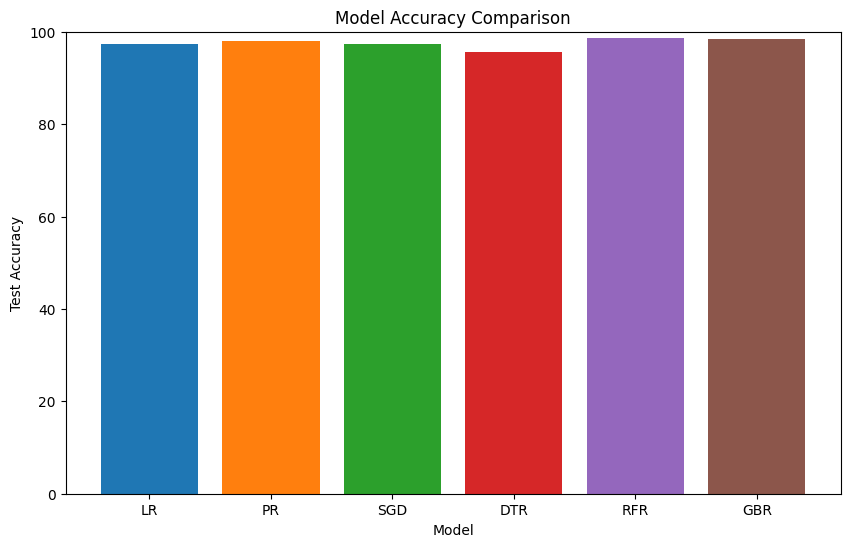

In [106]:
model_names = ['LR', 'PR', 'SGD', 'DTR', 'RFR', 'GBR']
accuracy_scores = [100 - ((0.06921430666971524/ range) * 100), 100 - ((0.05029410209981026/ range) * 100), 100 - ((0.06794438451446062/ range) * 100),
                   100 - ((0.11220490482230228 / range) * 100),100 - ((0.03663989565217292/ range) * 100), 100 - ((0.03959852015238512/ range) * 100) ]
colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=colours)
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)
plt.show()